<a href="https://colab.research.google.com/github/edmenciab733/inteligencia_artificial/blob/main/la_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducción

Un modelo matemático es una herramienta fundamental en la actualidad para el desarrollo de algoritmos que facilitan la realización de tareas de inteligencia artificial.

La regresión lineal es el modelo más simple, fundamentado en un principio muy básico que se relaciona con la ecuación de una línea recta.

$$ y = mx + b $$


La transformación de esta ecuación ha permitido la creación de modelos más complejos tanto para modelos de clasificación como regresión.



# Regresión Lineal

La regresión lineal, a pesar de su simplicidad, es un modelo sumamente efectivo. Su finalidad es fundamental: identificar la relación entre dos o más variables para entender la influencia recíproca entre ellas, tal como lo he mencionado antes. Para comprender mejor la ecuación, desglosemos sus componentes.

$x$: representa la variable conocida como independiente, la cual, en el contexto del algoritmo, constituye el dato en sí dentro del problema en cuestión.


$m$: es la pendiente de la línea. Esta representa el grado de inclinación o cambio y es un indicador de la relación entre las variables independiente y dependiente.

$b$: es el término de intercepción en la ecuación de la recta. Visualizando la recta en un plano cartesiano, $b$ señala el punto donde la recta intersecta con el eje $y$. En términos prácticos, dentro de un contexto aplicado, también representa el sesgo o la desviación sistemática en los datos.

Ahora, consideremos $y$, la variable dependiente, que es el resultado que buscamos predecir o entender para tomar decisiones basadas en datos.

Aunque la regresión lineal se utiliza en escenarios básicos, tiene el potencial de producir resultados muy robustos. Su versión avanzada, la regresión lineal múltiple, extiende el concepto de $x$ de una sola característica a $n$ características. Para ilustrar esto, veamos algunos ejemplos prácticos.


## Construcción de datos sintéticos

Comencemos creando datos sintéticos. Para esto, emplearemos la biblioteca numpy y la función [random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html), que nos facilita esta tarea. Es importante recordar que esta librería se utiliza con propósitos educativos; en situaciones habituales, nuestros datos provendrían de fuentes más complejas como hojas de cálculo de Excel, bases de datos, data lakes o diversas otras fuentes de datos.

In [ ]:
import numpy as np
# Antes de avanzar, es importante establecer una semilla para la generación de números aleatorios.
# Este paso garantiza que los resultados sean reproducibles, permitiendo obtener los mismos datos en cada ejecución del código.
np.random.seed(0)

``x = np.random.rand(100, 1)``: Esta línea crea un arreglo de 100 elementos, donde cada elemento es un número aleatorio entre 0 y 1. Estos números representan los valores independientes en su ecuación. En el contexto de su ejemplo, estos podrían simbolizar la cantidad de "saltos" (cambios) diarios que experimentan las acciones de Google en el eje x. Podría ser, por ejemplo, la cantidad de veces que el precio de la acción cambia a lo largo de un día.

`` y = 5 + 10*x ``: De manera similar, esta línea también genera 100 números pero su generación ya no de manera aleatoria, sino más producto de operar con $x$ con la pendiente ($m = 10 $) y el bias ($ b = 5 $). Sin embargo, en este caso, representan los valores dependientes en su ecuación. Siguiendo su ejemplo, estos podrían simbolizar otra métrica relacionada con las acciones de Google en el eje y, como el grado de variación en el precio de la acción en cada uno de esos "saltos".

In [ ]:
# Números de datos.
n = 100

In [ ]:
x = np.random.rand(n, 1)
y = 5 + 10*x

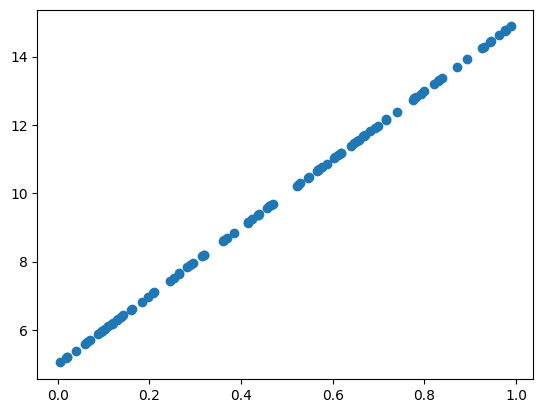

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

### El ruido

Al crear datos sintéticos, debemos recordar que rara vez se ajustarán perfectamente a una forma geométrica ideal como una recta, un círculo o un cuadrado; siempre habrá pequeñas variaciones que sugieran, pero no confirmen, una similitud. Para emular estas variaciones naturales en los datos, incorporamos ruido gaussiano a nuestro conjunto de datos sintéticos.

In [ ]:
ruido = np.random.normal(0, 1, (n, 1))

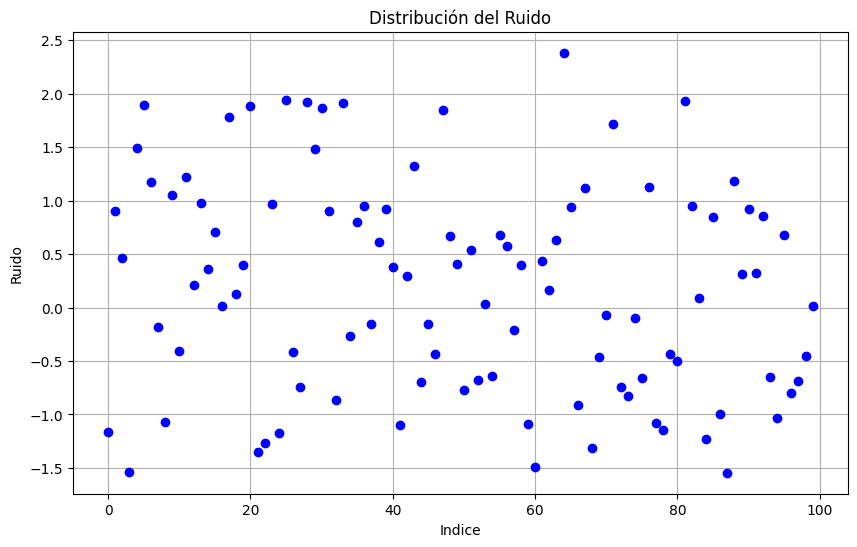

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ruido, marker='o', linestyle='none', color='blue')
plt.title('Distribución del Ruido')
plt.xlabel('Indice')
plt.ylabel('Ruido')
plt.grid(True)
plt.show()

In [ ]:
y = 10 * x + ruido + 5

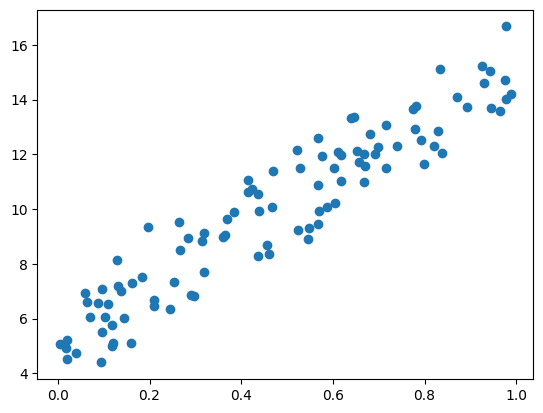

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Los datos ya han sido preparados, pero este proceso de pre-elaboración no es lo habitual. Normalmente, trabajamos con datos en bruto que requieren ser limpiados y procesados para eliminar valores atípicos y comprender las correlaciones existentes. Profundizaremos en estos aspectos y examinaremos cada punto en detalle, aprendiendo conceptos a través de ejemplos prácticos en futuras ocasiones. Por el momento, centrémonos en explorar el algoritmo

## El algoritmo

El algoritmo que usamos para predecir los valores de $y$ depende de la ecuación de una recta. Sin embargo, surge la cuestión de cuál es la recta adecuada para esto. Para determinarlo, necesitamos medir el error entre los valores esperados y los valores predichos. Una forma de hacerlo es utilizando el Error Cuadrático Medio (MSE), que se calcula como:   $$ \epsilon = \sum (y_e - y_p)^2 = \sum (y - (m*x + b))^2  $$ donde $y_e$ e $y_p$ son el valor esperado y el valor predicho.


Después de calcular el error, nuestro objetivo es minimizarlo. Para lograr esto, una técnica común es el uso del método de descenso del gradiente. Este proceso implica ajustar las variables  $b$ y $m$ que se inicializan en $0$. Es importante notar que $x$ es una variable independiente(tambien conocidos como hiperpametros de la función) y depende de los datos disponibles, por lo tanto, los parámetros que ajustamos son únicamente $b$ y $m$.

Para calcular el gradiente, el primero paso es derivar la función de costo respecto a los parametros ajustables.

Primero hagamos el calculo de la derivada de la función respecto a  $m$, para ello utilizamos la regla de la cadena(La regla de la cadena dice que la derivada de una función compuesta es la derivada de la función externa evaluada en la función interna multiplicada por la derivada de la función interna).

1-  Derivamos $(y_e - y_p)^2$
$$  dx = 2 * (y_e - y_p) $$

2- Derivamos $y_p$ donde $y_p = m*x + b $, primero respecto a $m$.
$$ \frac{\partial y_p}{\partial m} = -x $$

3- Derivada parcial respecto a $m$ de toda la función es $$ \frac{\partial y_\epsilon}{\partial m} = 2* (y_e - y_p) * (-x) $$


Ahora para $b$

1-  Derivamos $(y_e - y_p)^2$
$$  dx = 2 * (y_e - y_p) $$

2- Derivamos $y_p$ donde $y_p = m*x + b $, primero respecto a $b$.

$$ \frac{\partial y_p}{\partial b} = -1 $$

3- Derivada parcial respecto a $b$ de toda la función es:

$$  \frac{\partial y_\epsilon}{\partial b} = 2 * (y_e - y_p) * (-1) $$


Es importante recordar que debemos sumar las contribuciones al error de cada punto de datos para comprender completamente cómo los parámetros $ b $ y $ m $ afectan la función de coste globalmente.

El paso final es actualizar los valores de  $ b $ y $ m $ utilizando la tasa de aprendizaje y la magnitud del gradiente y dirección del gradiente, para conocer cuál es el mejor paso que debemos dar.

Estos pasos debemos repetir tantas veces, hasta encontrar el minimo, es decir, hasta que los cambios en la función de coste sean tan insignificante que no valga la pena realizar los cambios.


In [ ]:
import matplotlib.pyplot as plt
def regresion_lineal(x, y, learning_rate=0.001, steps=10, m=0, b=0, dibujarPasos = False):

    # las siguientes 3 lineas son para ayudar visualizar la evalución del algoritmo en cada 10 pasos.
    num_filas = (steps // 10 + 2) // 3
    plt.figure(figsize=(12, num_filas * 4))
    grafico_contador = 1
    for i in range(steps):
        # Predicción del modelo
        y_p = m * x + b

        # como función del error usaremos el Error cuadratico medio ( y - yp)^2
        # donde yp =  m * x + b
        error = sum((y - y_p)**2)

        # para saber cuando aporta m y b respecto a al resultado del error,
        # debemos derivar parcialmente.

        dfm = sum(2* (y- y_p) * -x )

        dfb = sum(2 * (y- y_p)* - 1  )
        m_grad = dfm
        b_grad = dfb

        # para actualizar  a los nuevos de m y b, debemos multiplicar la taza
        # de aprendizaje con la magnitud(y direccion) obtenida, para luego restar
        # con el valor actual.

        m -= learning_rate * m_grad
        b -= learning_rate * b_grad


        # Todo el condicional de abajo solo sirve para mostrar la evolución de la recta,
        # y se pueda entender mejor como una correción de los parametros ajustará los
        # se irá ajustando los datos. Para omitir puede borrarlo,
        # o pasar el parametros dibujarPasos en False.
        if i % 10 == 0 and dibujarPasos:
            ax = plt.subplot(num_filas, 3, grafico_contador)
            ax.scatter(x, y, color='blue')
            ax.plot(x, y_p, color='orange')
            ax.set_title(f'Iteración {i}')
            grafico_contador += 1

    return m, b, error, y_p

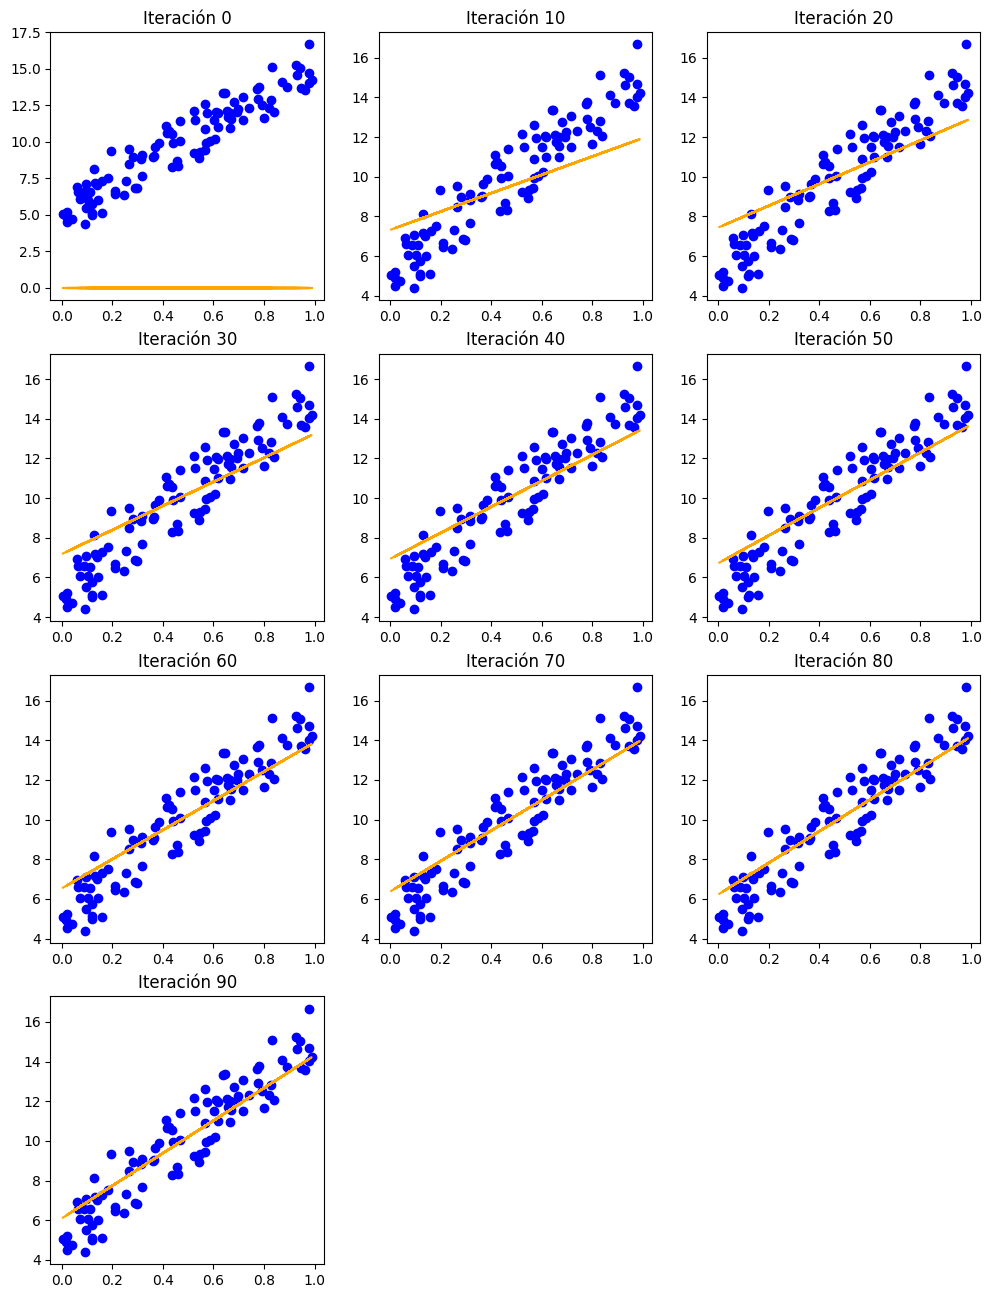

In [ ]:
m, b, error, y_p = regresion_lineal(x, y, steps=100, dibujarPasos = True)

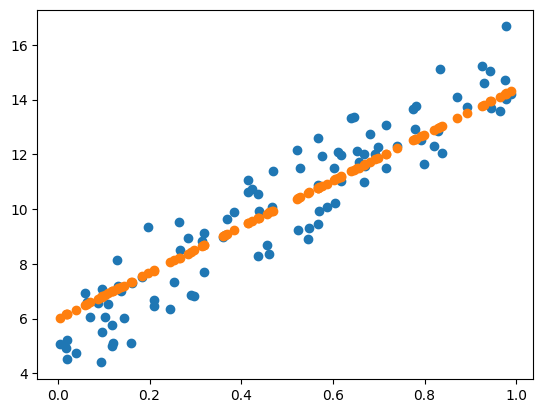

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(x, y_p)
plt.show()

Una vez que hayamos determinado la recta que mejor se ajusta a nuestros datos utilizando el algoritmo de regresión lineal, estamos en posición de hacer predicciones. Esto implica utilizar la ecuación de la recta con los parámetros
$b$ y $m$ que hemos afinado durante el entrenamiento para calcular los valores estimados de $y$  para nuevos valores de $x$

In [ ]:
x_new = [1.1,1.08, 1.5, 1.3, 1.2, 1,0.9]
y_new = m*x_new + b
print(y_new)

[15.26079902 15.09213253 18.63412887 16.94746395 16.10413148 14.41746656
 13.57413409]


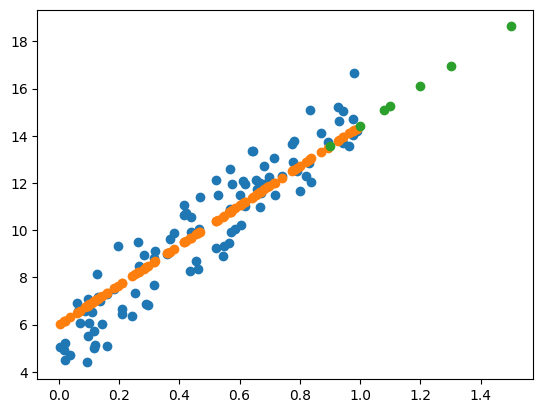

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(x, y_p)
ax.scatter(x_new, y_new)
plt.show()

He usado **x_new** para introducir nuevos valores aleatorios y predecir los correspondientes valores de **y_new** basándome en los valores ideales de $b$ y $m$, en este caso mostrando los puntos en verde pars las nuevas predicciones.

El objetivo de cualquier algoritmo de machine learning, se basa en encontrar en el mejor conjunto de parametros para el modelo, y con ello estimar los nuevos valores.



## La medida del Error

El MSE es un indicador clave en la evaluación de modelos de regresión, reflejando la proximidad entre las predicciones del modelo y los valores reales. Calcula la media de los cuadrados de las diferencias entre las predicciones y los valores reales para penalizar errores más grandes y evitar la cancelación de errores positivos y negativos.

El significado del MSE es el siguiente:

MSE = 0: Predicciones perfectas, raras en la práctica.
MSE bajo: Predicciones promedio cercanas a los valores reales, indicando un modelo preciso.
MSE alto: Grandes discrepancias entre las predicciones y los valores reales, sugiriendo un modelo impreciso.

El MSE se expresa al cuadrado, su resultado se entiende mejor luego de aplicar la raiz cuadrada al valor dado.

La calidad del modelo se contextualiza según el problema. Un error de 9,000 USD en la predicción de precios de casas podría ser menor si el valor real ronda los 500,000 USD, pero significativo para casas de 30,000 USD. La adecuación del modelo, entonces, va más allá de solo minimizar el error y debe considerar la relevancia práctica en el contexto específico. Si el modelo no cumple con los requisitos, se exploran alternativas para mejorar las predicciones.

Para la impresión de abajo, no podemos valorar si es mucho o poco, ya que los datos están basados sintéticos, pero podemos asegurar que es el minimo en 100 repeticiones.

In [ ]:
print( "El MSE de nuestro problema es: {}".format(error[0]))

El MSE de nuestro problema es: 118.81803455731111


# Conclusión
Un algoritmo de Machine Learning no es más que un modelo matemático que trata de emular un patrón de información de tal forma a disminuir la incertidumbre a la  hora de tomar decisiones.

Hemos visto que un modelo de regresión lineal es fácil de implementar y que entender matemáticamente se reduce a repasar la ecuación de la recta y entender sus parámetros.

en la siguientes entregas iremos profundizando sobre otros algoritmos que tendrán las mismas bases que el modelo de regresión lineal.
